In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
#concatenate all dataframes
accTable=[]
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC08','MSC09','MSC10']
for i in subList:
    df=pd.read_csv('~/Desktop/MSC_Alexis/analysis/output/results/MVPA_mat/within_sub_test/' +i +'_acc.csv')
    df['sub']=i
    accTable.append(df)
results=pd.concat(accTable)

In [4]:
#results.replace(0, np.nan, inplace=True)
results.rename(columns={'Row':'TestVariables'}, inplace=True)

In [5]:
results

,TestVariables,mem,mixed,motor,sub
0,mem,0.000,0.995,0.325,MSC01
1,mixed,1.000,0.000,0.760,MSC01
2,motor,1.000,1.000,0.000,MSC01
0,mem,0.000,0.240,0.000,MSC02
1,mixed,0.935,0.000,0.000,MSC02
2,motor,0.925,0.085,0.000,MSC02
0,mem,0.000,0.205,0.000,MSC03
1,mixed,0.000,0.000,0.000,MSC03
2,motor,0.000,0.665,0.000,MSC03
0,mem,0.000,1.000,0.545,MSC04


In [9]:
#groupby the testing variables
grouped_df=results.groupby('TestVariables')
memTest_df=grouped_df.get_group('mem')
memTest_df.set_index('sub', inplace=True)
memTest_df.drop(columns=['mem', 'TestVariables'], inplace=True)
memTest_df.drop(['MSC03', 'MSC08','MSC09'], inplace=True)
memTest_df.at['MSC06', 'motor'] = np.nan
memTest_df.at['MSC07', 'motor'] = np.nan

mixedTest_df=grouped_df.get_group('mixed')
mixedTest_df.set_index('sub', inplace=True)
mixedTest_df.drop(columns=['mixed','TestVariables'], inplace=True)
mixedTest_df.drop(['MSC08','MSC09'], inplace=True)
mixedTest_df.at['MSC03', 'mem'] = np.nan
mixedTest_df.at['MSC06', 'motor'] = np.nan
mixedTest_df.at['MSC07', 'motor'] = np.nan

motorTest_df=grouped_df.get_group('motor')
motorTest_df.set_index('sub', inplace=True)
motorTest_df.drop(columns=['motor','TestVariables'], inplace=True)
motorTest_df.drop(['MSC06', 'MSC07','MSC08','MSC09'], inplace=True)
motorTest_df.at['MSC03', 'mem'] = np.nan

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
motorTest_df

,mem,mixed
sub,,
MSC01,1.000,1.000
MSC02,0.925,0.085
MSC03,NaN,0.665
MSC04,1.000,1.000
MSC05,1.000,0.980
MSC10,1.000,1.000


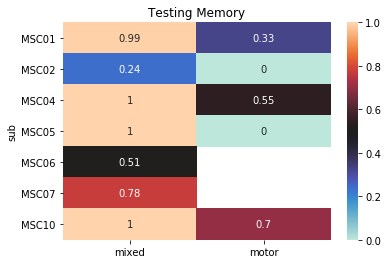

In [15]:
ax=sns.heatmap(memTest_df, annot=True, center=.5)
ax.set_title('Testing Memory')
fig=ax.get_figure()
fig.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/within_sub_mem_heatmap.png', bbox_inches='tight')

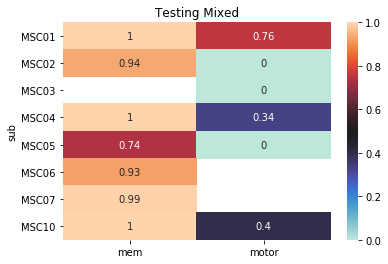

In [19]:
ax=sns.heatmap(mixedTest_df, annot=True, center=.5)
ax.set_title('Testing Mixed')
fig=ax.get_figure()
fig.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/within_sub_mix_heatmap.png', bbox_inches='tight')

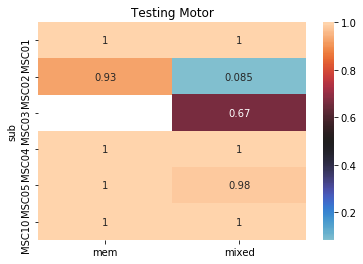

In [18]:
ax=sns.heatmap(motorTest_df, annot=True, center=.5)
ax.set_title('Testing Motor')
fig=ax.get_figure()
fig.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/within_sub_motor_heatmap.png', bbox_inches='tight')

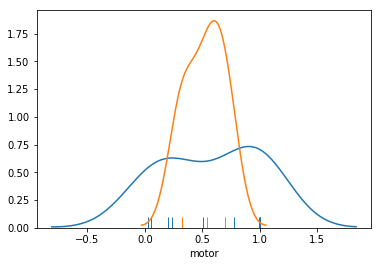

In [33]:
#univariate distribution of accuracy scores testing memory when trained on mixed
sns.distplot(memTest_df.mixed, hist=False, rug=True)
#tested memory trained on motor 
sns.distplot(memTest_df.motor, hist=False, rug=True)

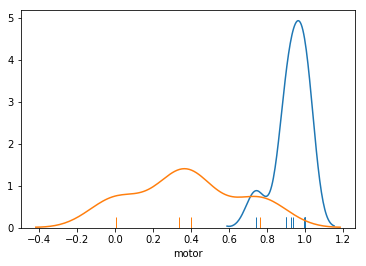

In [7]:
#tested on mixed when trained on memory
sns.distplot(mixedTest_df.mem, hist=False, rug=True)
#tested on mixed trained on motor 
sns.distplot(mixedTest_df.motor, hist=False, rug=True)

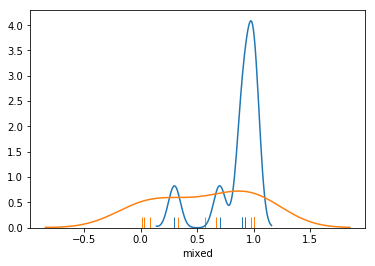

In [35]:
#tested on motor trained on memory
ax=sns.distplot(motorTest_df.mem, hist=False, rug=True)
#tested on motor trained on mixed
ax1=sns.distplot(motorTest_df.mixed, hist=False, rug=True)

In [37]:
#memTest_df
#motorTest_df
mixedTest_df

,TestVariables,mem,mixed,motor,sub
1,mixed,1.000,NaN,0.760,MSC01
1,mixed,0.935,NaN,NaN,MSC02
1,mixed,NaN,NaN,NaN,MSC03
1,mixed,1.000,NaN,0.335,MSC04
1,mixed,0.740,NaN,NaN,MSC05
1,mixed,0.925,NaN,NaN,MSC06
1,mixed,0.995,NaN,0.005,MSC07
1,mixed,0.900,NaN,NaN,MSC08
1,mixed,0.900,NaN,NaN,MSC09
1,mixed,1.000,NaN,0.400,MSC10
